In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.graficar import graficar_serie 
from src.ARIMA_experimento import ARIMA_experimento
from src.evaluar import evaluar_forecast


###  Descomposición de la serie ###
from statsmodels.tsa.seasonal import seasonal_decompose

# Correspondiente a un horizonte de 20 muestras

Si en este caso solamente se usan 20 muestras de horizonte, entonces con ventana voy a agarrar unas 200 para entrenar

In [32]:
ruta_v2 = 'data/clean_data/v2.csv'
v2 = pd.read_csv(ruta_v2, index_col = 0)
print(v2.shape)
v2.tail()

(180, 1)


,Valores
1475,1036.1
1476,1040.5
1477,1057.3
1478,1065.7
1479,1062.1


In [33]:
ruta_h2 = 'data/clean_data/h2.csv'
h2 = pd.read_csv(ruta_h2, index_col = 0)
print(h2.shape)
h2.head()

(20, 1)


,Valores
1480,1043.9
1481,1047.9
1482,1065.6
1483,1063.9
1484,1058.5


In [34]:
variable = 'Valores'
v2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180 entries, 1300 to 1479
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Valores  180 non-null    float64
dtypes: float64(1)
memory usage: 2.8 KB


### Ventana

v2 shape: (180, 1)


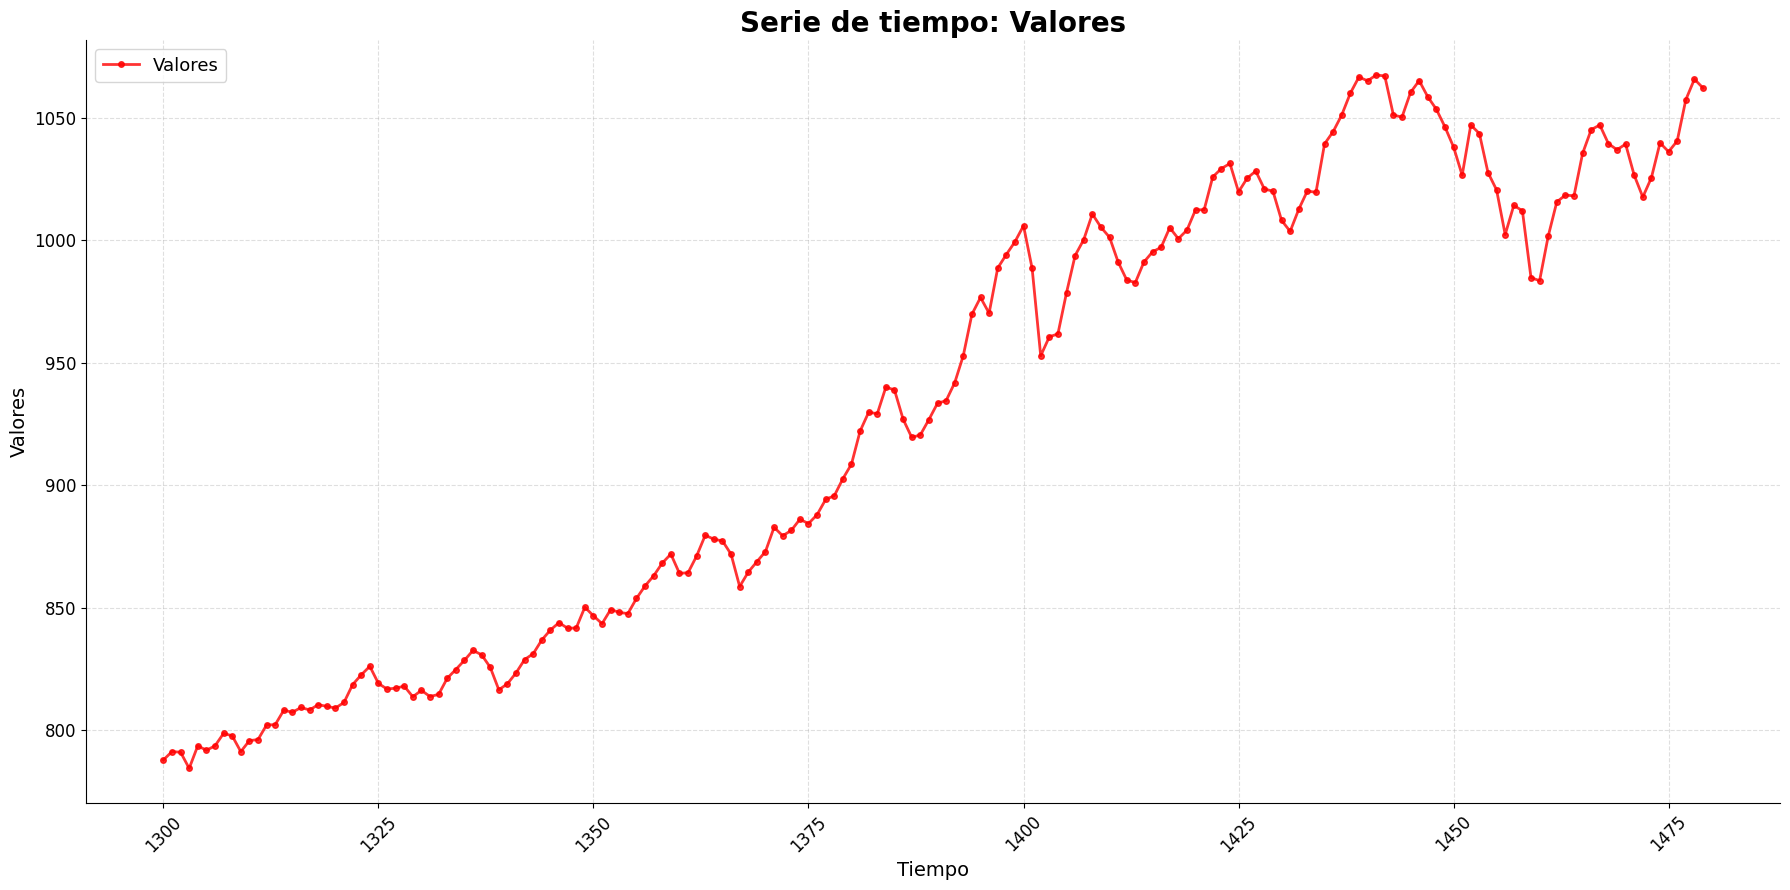

In [35]:
print(f'v2 shape: {v2.shape}')
graficar_serie(v2, variable, color = 'red')

### Horizonte

h2 shape (20, 1)


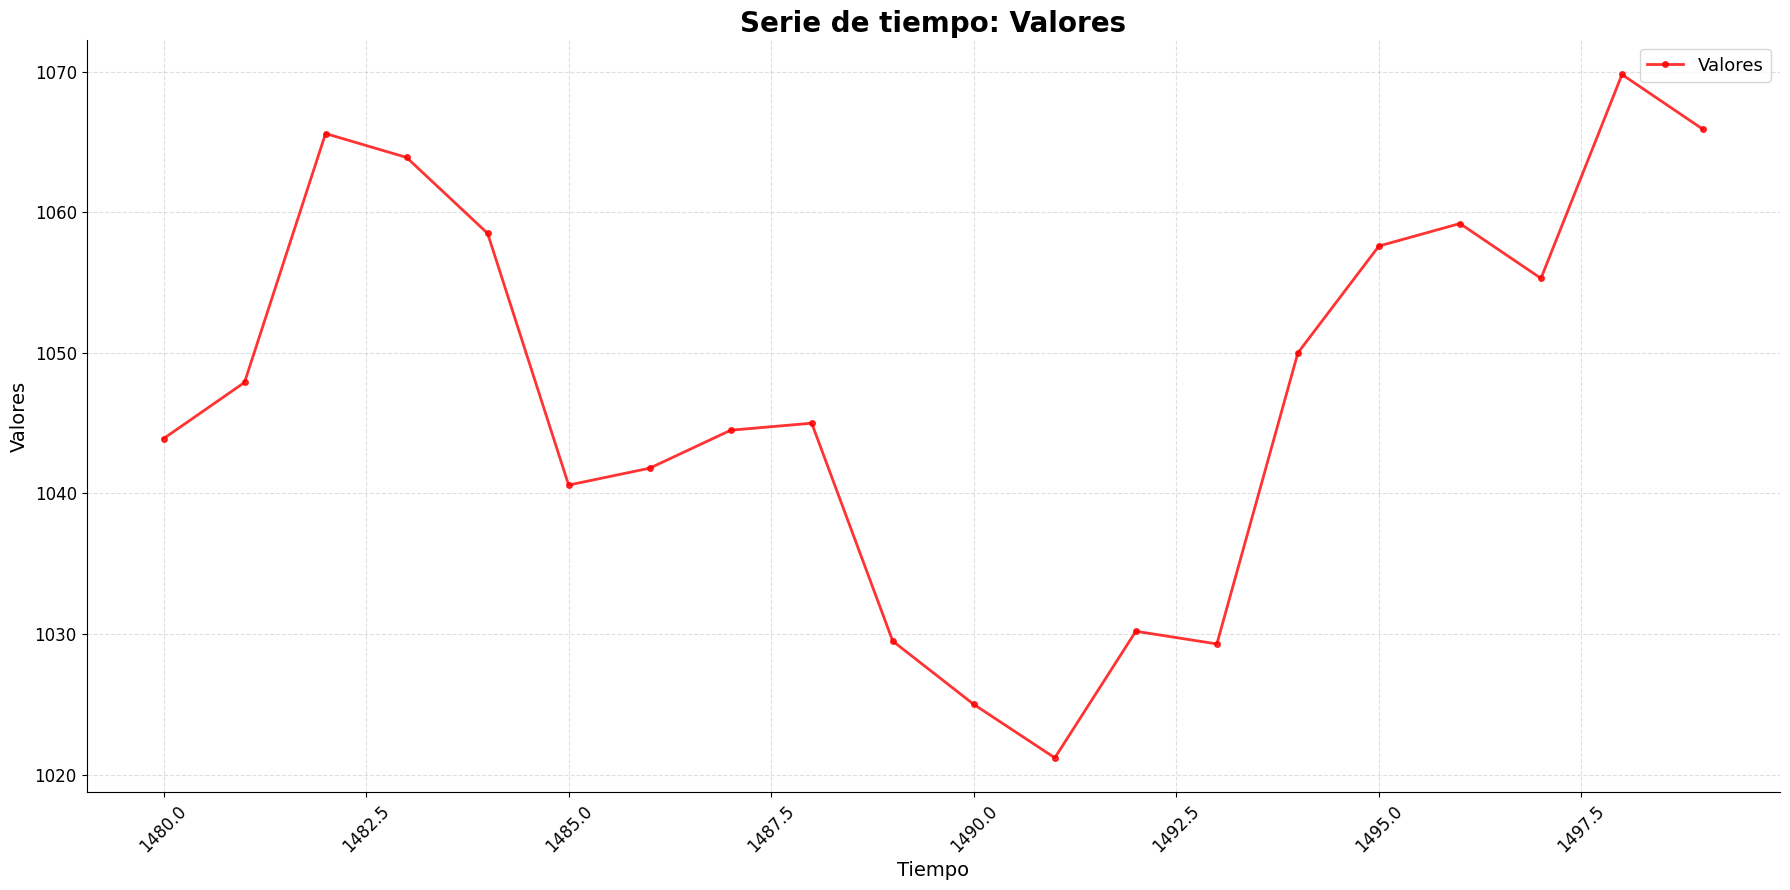

In [36]:
print(f'h2 shape {h2.shape}')
graficar_serie(h2, variable, color = 'r')

### Descomponer la Ventana

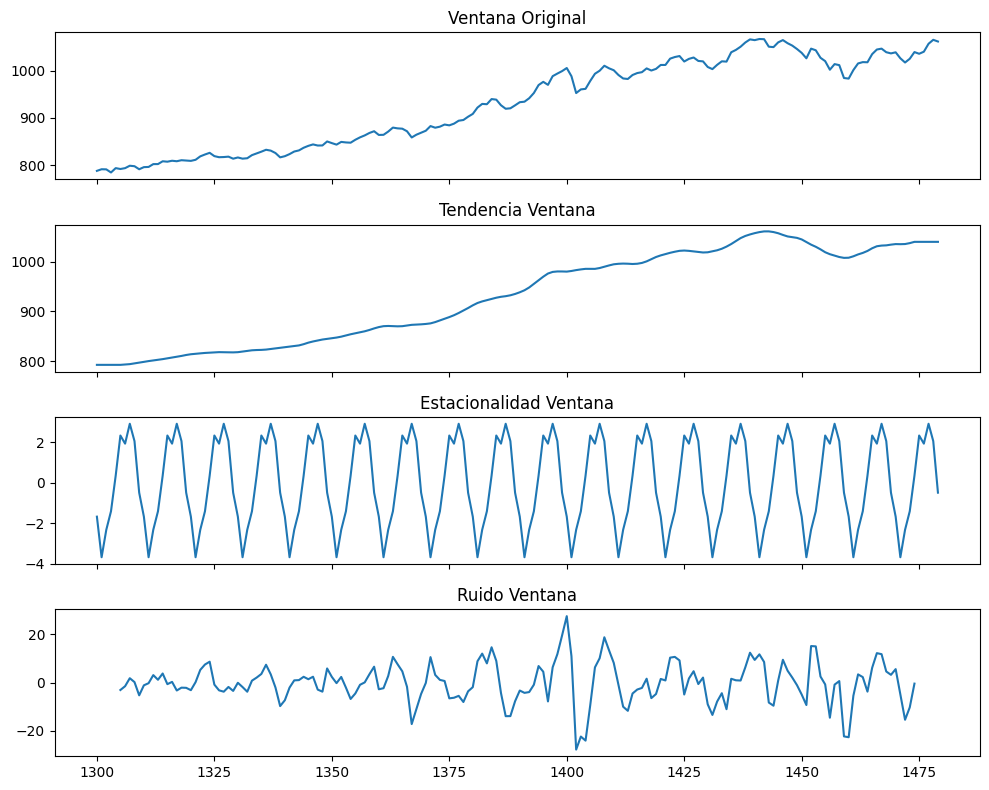

In [37]:
descomposicion_v = seasonal_decompose(v2['Valores'], model = 'additive', period = 10)

tendencia_v = descomposicion_v.trend
tendencia_v = tendencia_v.interpolate(method = 'linear', limit_direction = 'both')
estacionalidad_v = descomposicion_v.seasonal
ruido_v = descomposicion_v.resid

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize = (10, 8), sharex = True)

v2['Valores'].plot(ax = ax1, title = 'Ventana Original')
tendencia_v.plot(ax = ax2, title = 'Tendencia Ventana')
estacionalidad_v.plot(ax = ax3, title = 'Estacionalidad Ventana')
ruido_v.plot(ax = ax4, title = 'Ruido Ventana')

plt.tight_layout()
plt.show()
plt.close()

### Descomponer el Horizonte

<Axes: title={'center': 'Ruido Horizonte'}>

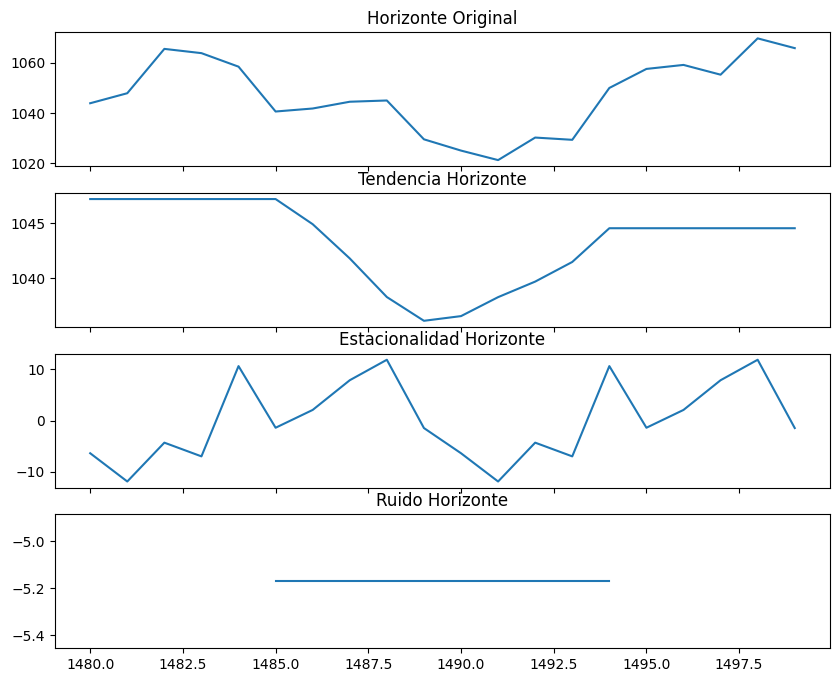

In [38]:
descomposicion_h = seasonal_decompose(h2['Valores'], model = 'additive', period = 10)

tendencia_h = descomposicion_h.trend
tendencia_h = tendencia_h.interpolate(method = 'linear', limit_direction = 'both')
estacionalidad_h = descomposicion_h.seasonal
ruido_h = descomposicion_h.resid

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize = (10, 8), sharex = True)

h2['Valores'].plot(ax = ax1, title = 'Horizonte Original')
tendencia_h.plot(ax = ax2, title = 'Tendencia Horizonte')
estacionalidad_h.plot(ax = ax3, title = 'Estacionalidad Horizonte')
ruido_h.plot(ax = ax4, title = 'Ruido Horizonte')

### Restar la tendencia a la ventana

shape V1       : (180, 1)
shape tendencia: (180,)
shape simple   : (180, 1)


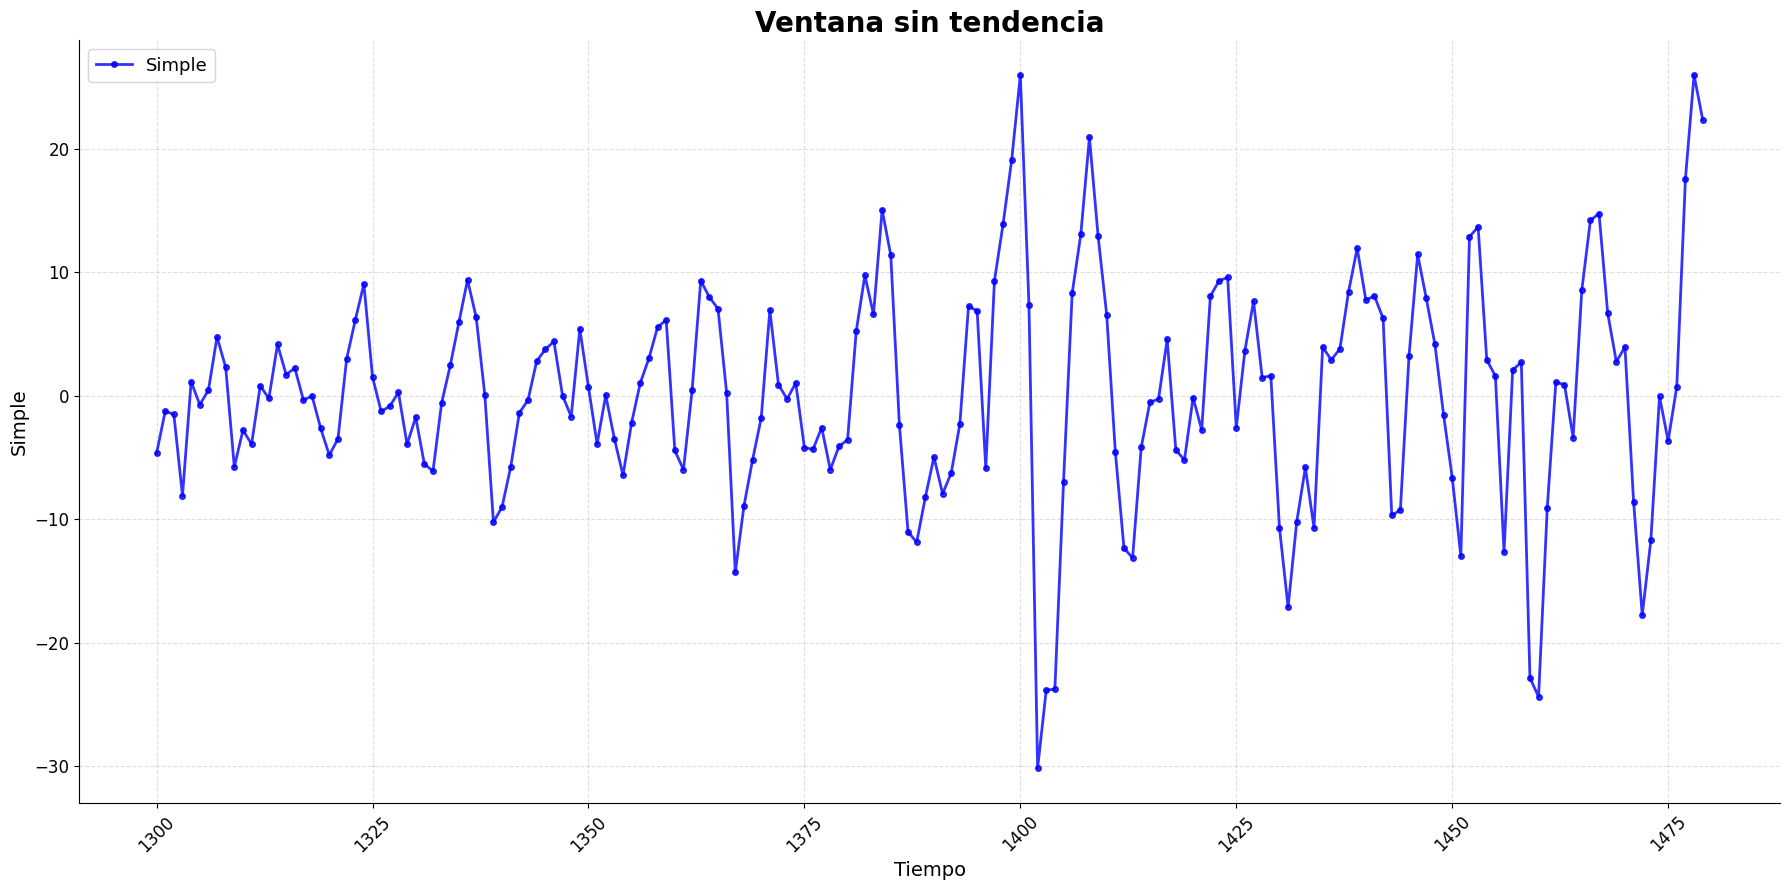

In [39]:
simple = v2['Valores'] - tendencia_v
simple = pd.DataFrame(simple, columns = ['Simple'])

print(f'shape V1       : {v2.shape}')
print(f'shape tendencia: {tendencia_v.shape}')
print(f'shape simple   : {simple.shape}')
graficar_serie(simple, 'Simple', color = 'blue', titulo = 'Ventana sin tendencia')

### Experimento 2

/home/jair/anaconda3/envs/series_env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/jair/anaconda3/envs/series_env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)



 Modelo ARIMA(1,1,1) entrenado exitosamente

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  180
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -606.842
Date:                Sun, 02 Nov 2025   AIC                           1219.685
Time:                        15:45:46   BIC                           1229.213
Sample:                             0   HQIC                          1223.549
                                - 180                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5592      0.143     -3.904      0.000      -0.840      -0.278
ma.L1          0.7615      0.121      6.305      0.000       0.525       0.998
sigma2

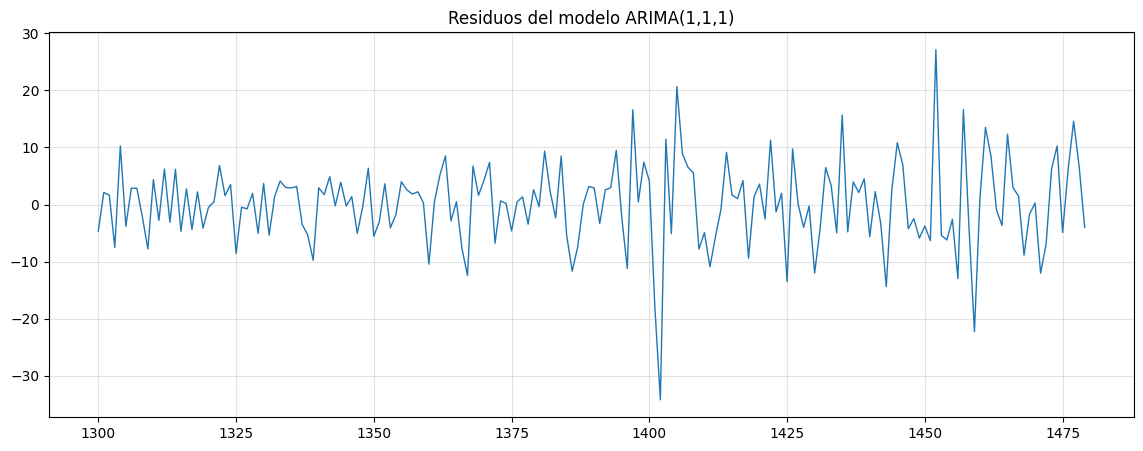

<Figure size 1400x400 with 0 Axes>

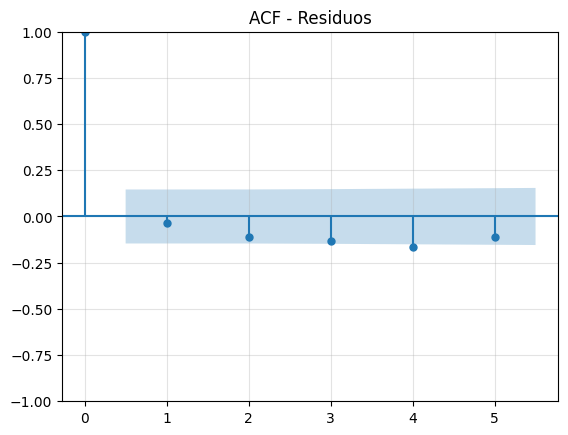

<Figure size 1400x400 with 0 Axes>

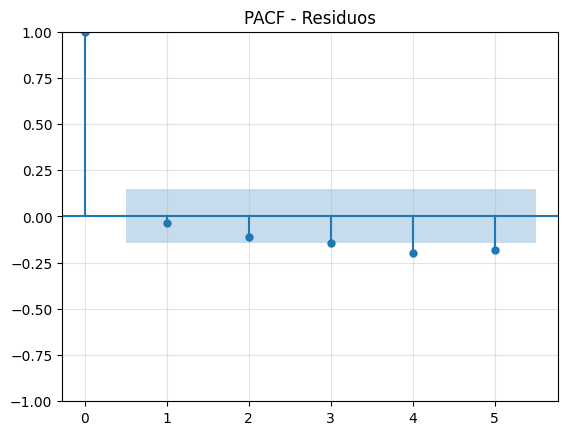


 Test de Ljung - Box ¿Es ruido blanco?

     lb_stat  lb_pvalue
1   0.257070   0.612140
2   2.452107   0.293448
3   5.768024   0.123458
4  10.941291   0.027232
5  13.145229   0.022055

 Interpretacion de la Hipótesis nula

Lag 1: No rechaza Ho -- Residuos se comportan como ruido blanco
Lag 2: No rechaza Ho -- Residuos se comportan como ruido blanco
Lag 3: No rechaza Ho -- Residuos se comportan como ruido blanco
Lag 4: Rechaza Ho, acepta H1 -- Hay correlación en los residuos
Lag 5: Rechaza Ho, acepta H1 -- Hay correlación en los residuos


In [40]:
serie = pd.Series(simple['Simple'].values, index = v2.index)
p, d, q = 1, 1, 1
resultado, residuos = ARIMA_experimento(serie, p, d, q, 5)

### Forecast

/home/jair/anaconda3/envs/series_env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/jair/anaconda3/envs/series_env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


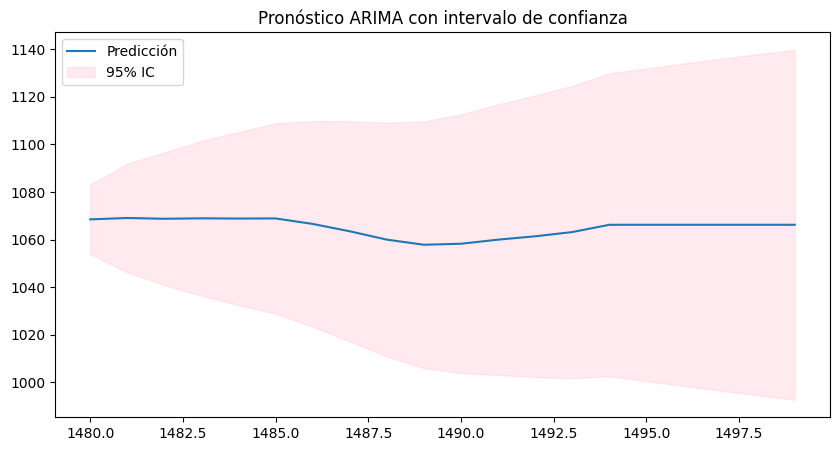

In [41]:
forecast_obj = resultado.get_forecast(steps = len(h2))

forecast_std = forecast_obj.predicted_mean
forecast_std.index = h2.index

forecast_reescalado = forecast_std + tendencia_h

intervalo = forecast_obj.conf_int(alpha = 0.05)
intervalo.index = h2.index
intervalo = intervalo + tendencia_h.values.reshape(-1, 1)

# Graficar
plt.figure(figsize=(10,5))
plt.plot(forecast_reescalado, label='Predicción')
plt.fill_between(intervalo.index, intervalo.iloc[:, 0], intervalo.iloc[:, 1],
                 color='pink', alpha=0.3, label='95% IC')
plt.legend()
plt.title('Pronóstico ARIMA con intervalo de confianza')
plt.show()

### Evaluar Forecast

In [42]:
y_true = np.array(h2.values).flatten()
y_pred = np.array(forecast_reescalado).flatten()

print(f'shape y_true: {y_true.shape}')
print(f'shape y_pred: {y_pred.shape}')

medidas = evaluar_forecast(y_true, y_pred)
for nombre, valor in medidas.items():
    print(f'{nombre} : {np.round(valor, 4)}')

shape y_true: (20,)
shape y_pred: (20,)
RMSE : 21.4919
SMAPE : 1.7281
R2_Pearson : 0.5046


### Graficar

In [28]:
type(v2)

pandas.core.frame.DataFrame

In [29]:
completo = pd.concat([v2, h2])
type(completo)

pandas.core.frame.DataFrame

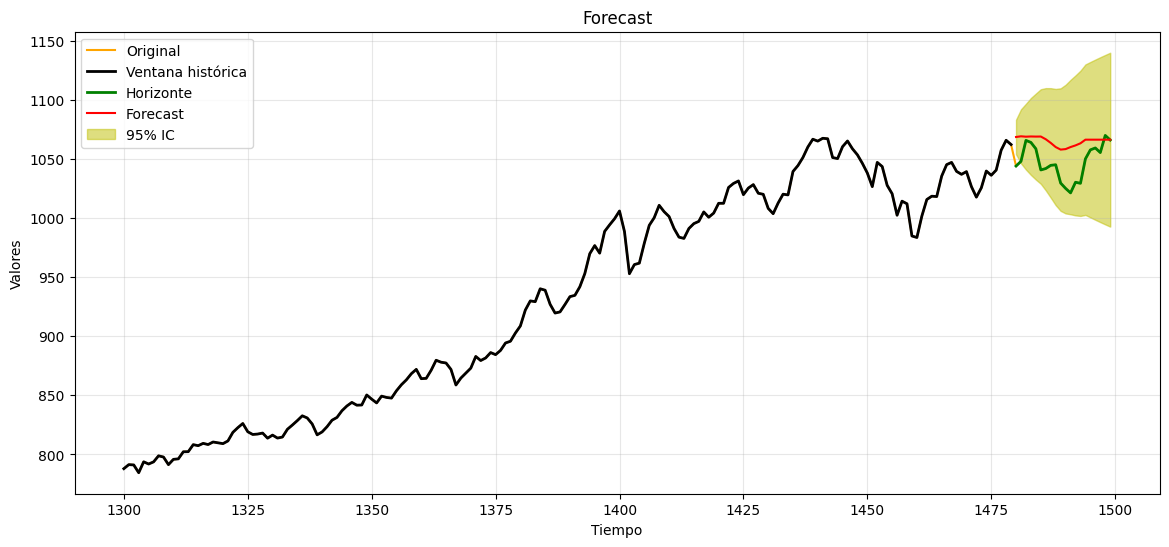

In [43]:
plt.figure(figsize=(14,6))
plt.plot(completo.index, completo, label='Original', color='orange', linewidth=1.5)
plt.plot(v2.index, v2.values, label='Ventana histórica', color='black', linewidth=2)
plt.plot(h2.index, h2.values, label='Horizonte', color='green', linewidth=2)
plt.plot(h2.index, forecast_reescalado, label='Forecast', color='r', linewidth=1.5)


plt.fill_between(intervalo.index, intervalo.iloc[:, 0], intervalo.iloc[:, 1],
                 color='y', alpha=0.5, label='95% IC')
plt.xlabel('Tiempo')
plt.ylabel('Valores')
plt.title('Forecast')
plt.legend()
plt.grid(alpha=0.3)
plt.show()